## Importing libraries

In [1]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.neural_network import MLPClassifier


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn


import random
import time


import warnings
warnings.filterwarnings('ignore')

## Acquire data

In [2]:
df =pd.read_csv('titanic.csv')
y = df['Survived']

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Statistics

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## checking datatype and missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Droping unwanted columns

In [6]:
df.drop(['PassengerId','Cabin', 'Ticket'] ,axis=1, inplace = True)

## Plot of Survived v/s Features

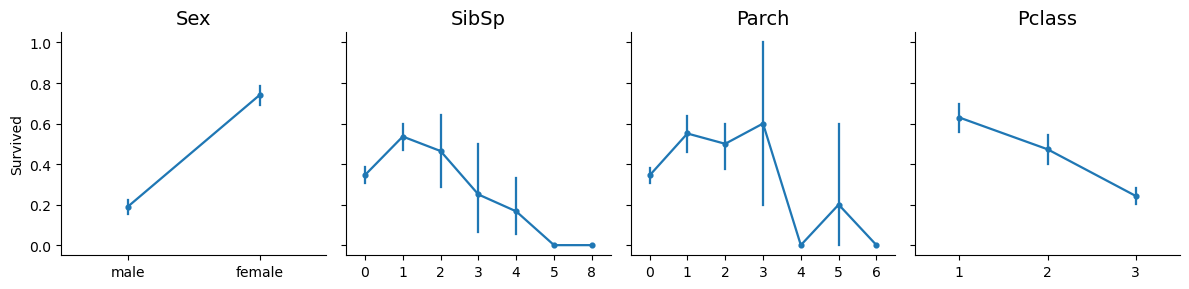

In [7]:
g = sns.PairGrid(df, y_vars="Survived", x_vars=["Sex",'SibSp', 'Parch', 'Pclass'], height=3)

g.map(sns.pointplot, palette="Set2", scale=0.6)

for ax in g.axes.flat:
    ax.set_title(ax.get_xlabel(), fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Survived')

g.fig.tight_layout()
plt.show()

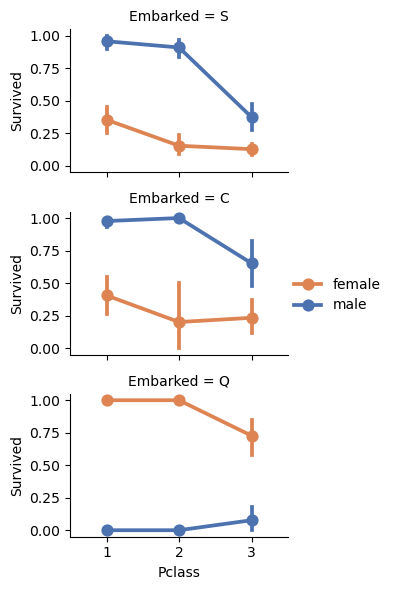

In [8]:
grid = sns.FacetGrid(df, row='Embarked',height=2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',ci=95.0, palette='deep')
grid.add_legend()

## Feature Engineering

Converting categorical string data into numerical data

In [9]:
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})
df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})

Extracting Title feature from Name, since Name's of passenger don't directly contribute 

In [10]:
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df.drop(['Name'] ,axis=1, inplace = True)

title_names = (df['Title'].value_counts() < 10)

df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(df['Title'].value_counts())

df['Title'] = df['Title'].replace({'Mr': 0, 'Miss': 1, 'Mrs':2,'Master':3, 'Misc':4})

Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64


## Handling missing values

Filling missing values, `Age` - KNNImputer, `Embarked` - mode

In [11]:
from sklearn.impute import KNNImputer

#Filling missing value by the use of KNN
imputer = KNNImputer(n_neighbors=7)
data_imputed = imputer.fit_transform(df)

data_imputed_df = pd.DataFrame(data_imputed, columns=df.columns)
df['Age'] = data_imputed_df['Age']

#Filling missing value with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Embarked'] = df['Embarked'].astype(int)

## cross-checking missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
 8   Title     891 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.3 KB


In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

## Feature Engineering

Creating interval's for `Age` and `Fare` features 

In [14]:
# create a new column FamilySize that represents the size of a passenger's family
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


df['IsAlone'] = 1
df['IsAlone'].loc[df['FamilySize'] > 1] = 0

# create new columns for Fare and Age containing descrete intervals 
df['FareBin'] = pd.qcut(df['Fare'], 4)
df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)

df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin
0,0,3,1,22.000000,1,0,7.2500,0,0,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,0,38.000000,1,0,71.2833,1,2,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,0,26.000000,0,0,7.9250,0,1,1,1,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,0,35.000000,1,0,53.1000,0,2,2,0,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,1,35.000000,0,0,8.0500,0,0,1,1,"(7.91, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,4,1,1,"(7.91, 14.454]","(16.0, 32.0]"
887,1,1,0,19.000000,0,0,30.0000,0,1,1,1,"(14.454, 31.0]","(16.0, 32.0]"
888,0,3,0,22.285714,1,2,23.4500,0,1,4,0,"(14.454, 31.0]","(16.0, 32.0]"
889,1,1,1,26.000000,0,0,30.0000,1,0,1,1,"(14.454, 31.0]","(16.0, 32.0]"


## Plots

<Axes: xlabel='Fare', ylabel='Density'>

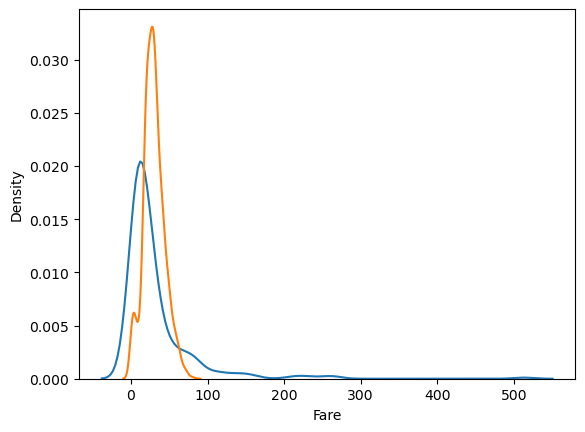

In [15]:
sns.kdeplot(df['Fare'])
sns.kdeplot(df['Age'])

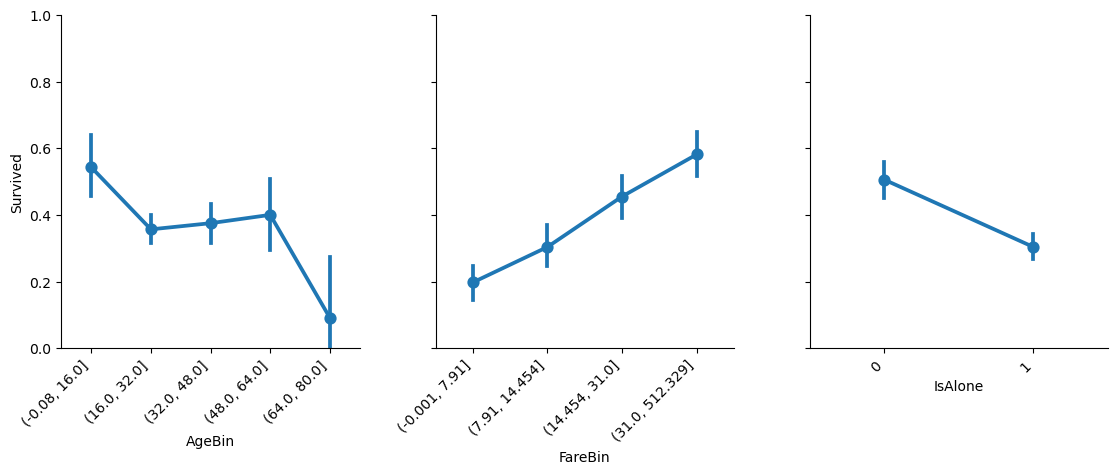

In [16]:
g = sns.PairGrid(df, y_vars="Survived",
                 x_vars=["AgeBin", 'FareBin','IsAlone'],
                 height=2, aspect=.5)


g.map(sns.pointplot)
g.set(ylim=(0, 1))

for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')


g.fig.set_size_inches(14, 5)

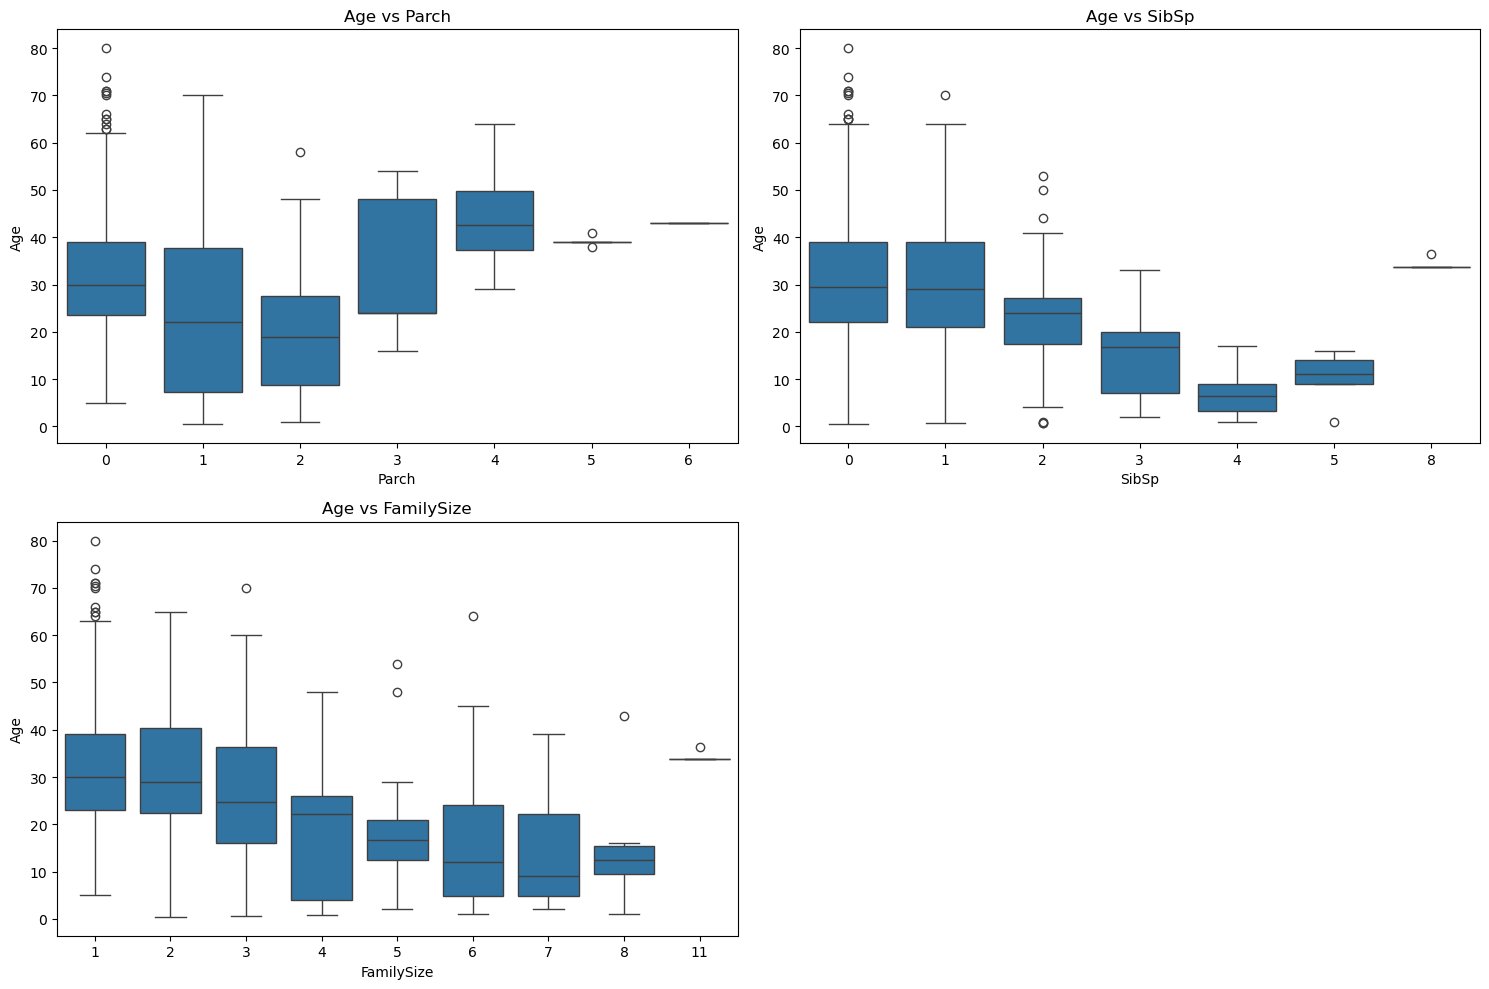

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Box plot for 'Parch' vs 'Age'
plt.subplot(2, 2, 1)
sns.boxplot(x='Parch', y='Age', data=df)
plt.title('Age vs Parch')

# Box plot for 'SibSp' vs 'Age'
plt.subplot(2, 2, 2)
sns.boxplot(x='SibSp', y='Age', data=df)
plt.title('Age vs SibSp')

# Box plot for 'FamilySize' vs 'Age'
plt.subplot(2, 2, 3)
sns.boxplot(x='FamilySize', y='Age', data=df)
plt.title('Age vs FamilySize')

# Adjust layout
plt.tight_layout()

plt.show()

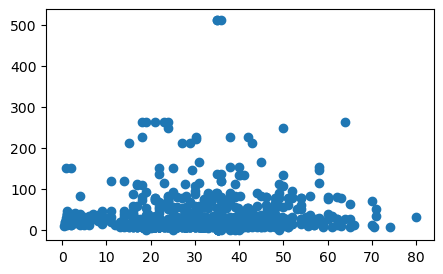

In [18]:
plt.figure(figsize=(5, 3))

plt.scatter(df['Age'], df['Fare'])
plt.show()

## Modifying Features

Assigning numerical values to intervals 

In [19]:
df.loc[ df['Age'] <= 16.0, 'Age'] = 0
df.loc[(df['Age'] > 16.0) & (df['Age'] <= 32.0), 'Age'] = 1
df.loc[(df['Age'] > 32.0) & (df['Age'] <= 48.0), 'Age']   = 2
df.loc[(df['Age'] > 48.0)  & (df['Age'] <= 64.0), 'Age'] = 3
df.loc[(df['Age'] > 64.0)  & (df['Age'] <= 80.0), 'Age'] = 4

df['Age'] = df['Age'].astype(int)

df = df.drop(['AgeBin'], axis=1)

In [20]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)

df = df.drop(['FareBin'], axis=1)

## Dealing with Outliers

#### Boxplot of features

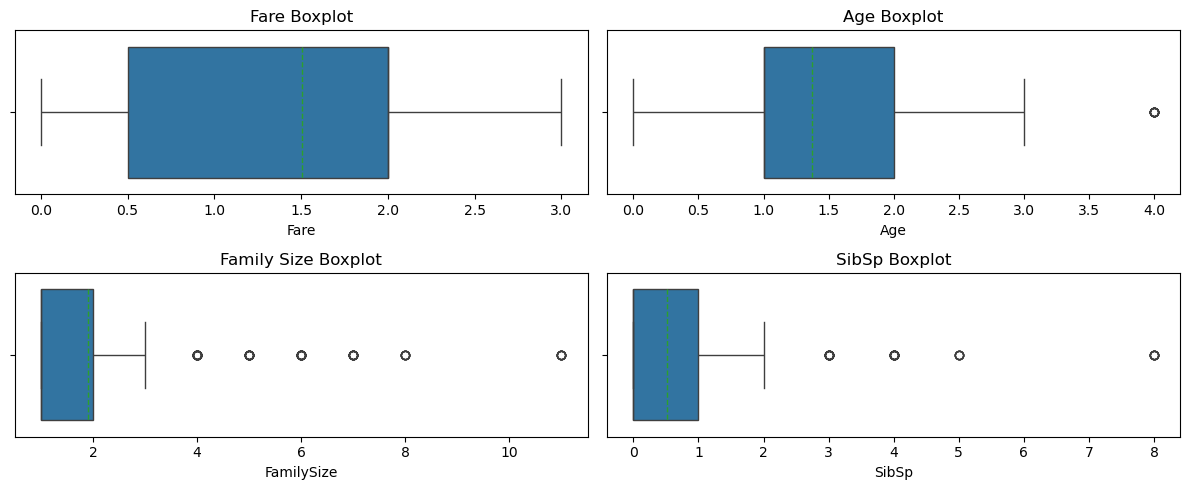

In [21]:
columns = ['Fare', 'Age', 'FamilySize', 'SibSp']
titles = ['Fare Boxplot', 'Age Boxplot', 'Family Size Boxplot', 'SibSp Boxplot']

plt.figure(figsize=[12, 5])


for i, (column, title) in enumerate(zip(columns, titles), start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], orient='h', showmeans=True, meanline=True)
    plt.title(title)

    
plt.tight_layout()


plt.show()

#### Using IQR method to replace outliers

In [22]:
columns = ['Fare', 'Age', 'FamilySize', 'SibSp']

for column in columns:
    per75 = df[column].quantile(0.75)
    per25 = df[column].quantile(0.25)
    iqr = per75 - per25

    up_lim = per75 + 1.5 * iqr
    low_lim = per25 - 1.5 * iqr

    df[column] = np.where(
        df[column] > up_lim,
        up_lim,
        np.where(df[column] < low_lim, low_lim, df[column])
    )

<Axes: xlabel='SibSp', ylabel='Density'>

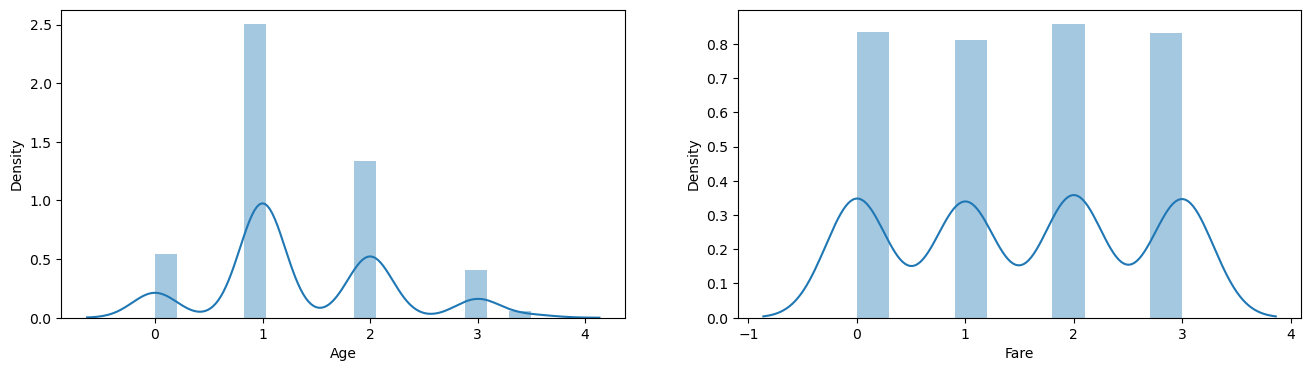

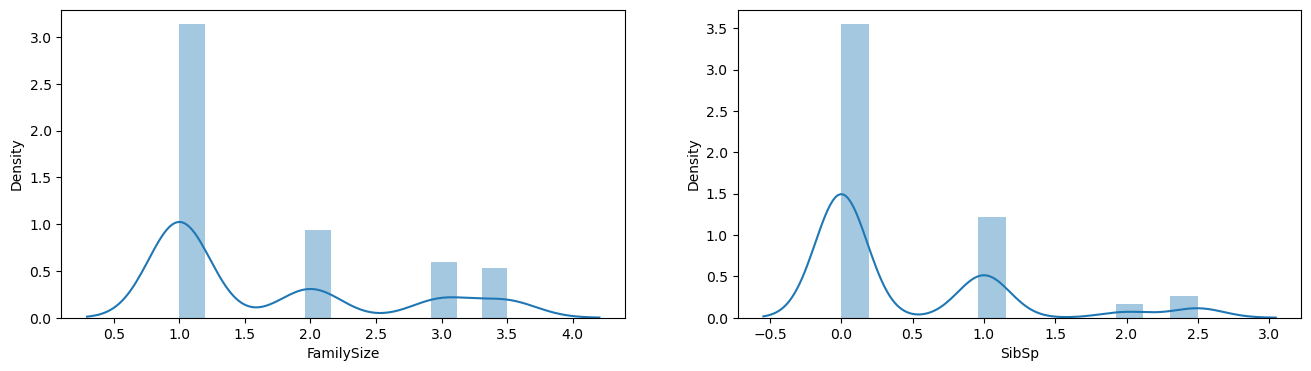

In [23]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
sns.distplot(df['Fare'])

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['FamilySize'])

plt.subplot(1,2,2)
sns.distplot(df['SibSp'])

#### Boxplot after replacing outliers

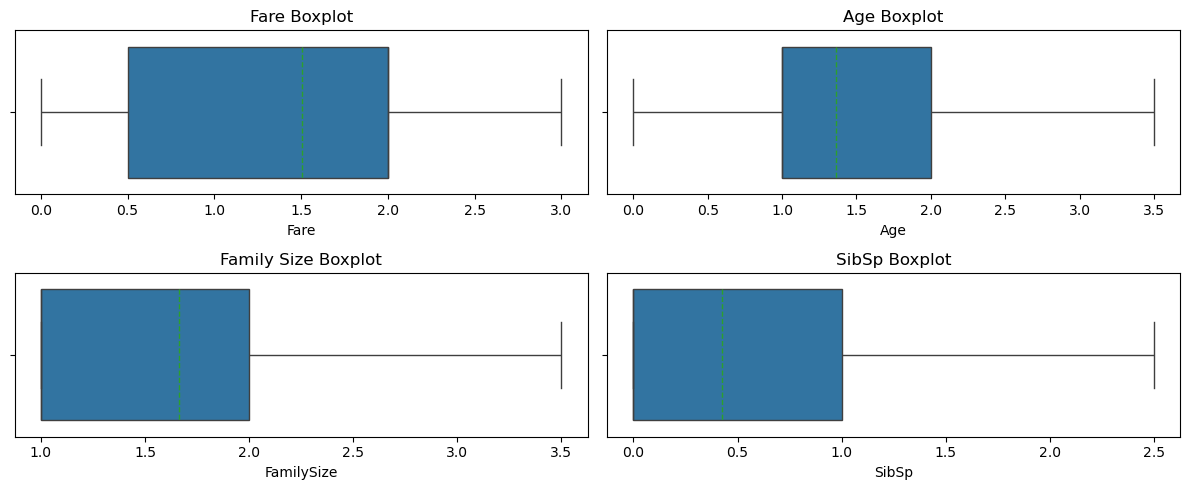

In [24]:
columns = ['Fare', 'Age', 'FamilySize', 'SibSp']
titles = ['Fare Boxplot', 'Age Boxplot', 'Family Size Boxplot', 'SibSp Boxplot']

plt.figure(figsize=[12, 5])


for i, (column, title) in enumerate(zip(columns, titles), start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], orient='h', showmeans=True, meanline=True)
    plt.title(title)

    
plt.tight_layout()


plt.show()

## cross-checking missing values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int32  
 8   Title       891 non-null    int64  
 9   FamilySize  891 non-null    float64
 10  IsAlone     891 non-null    int64  
dtypes: float64(4), int32(1), int64(6)
memory usage: 73.2 KB


## Final DataFrame

In [26]:
df = df.astype(int)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,1,1,0,0,0,0,2,0
1,1,1,0,2,1,0,3,1,2,2,0
2,1,3,0,1,0,0,1,0,1,1,1
3,1,1,0,2,1,0,3,0,2,2,0
4,0,3,1,2,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,1,0,4,1,1
887,1,1,0,1,0,0,2,0,1,1,1
888,0,3,0,1,1,2,2,0,1,3,0
889,1,1,1,1,0,0,2,1,0,1,1


#### Corelation b/w features

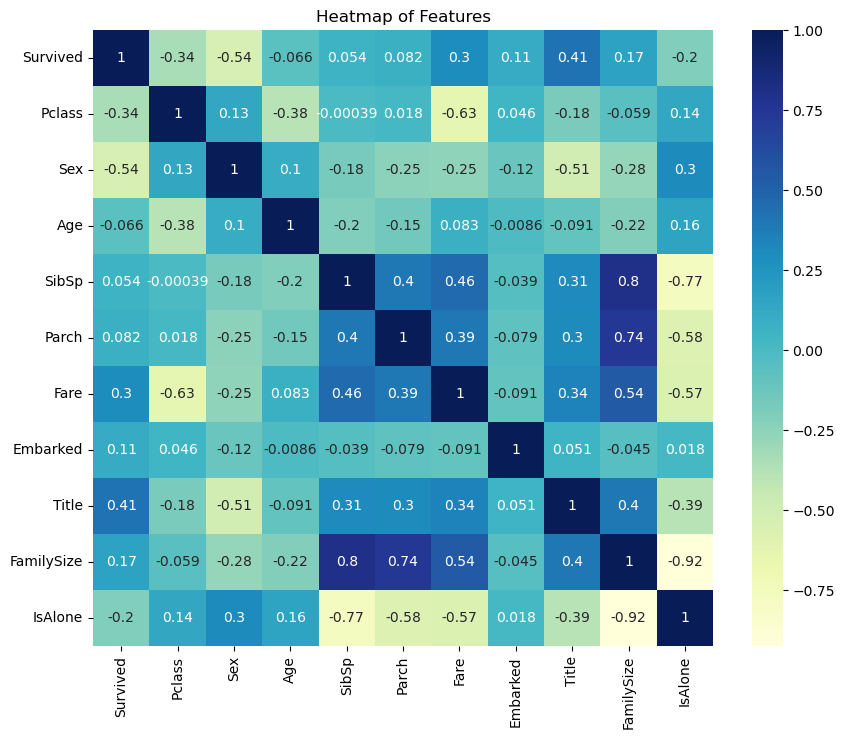

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

plt.title('Heatmap of Features')
plt.show()

#### Variable Initialization

In [28]:
df.drop(['Survived'],axis=1, inplace=True)
X = df

print(X.shape, y.shape)

(891, 10) (891,)


## Model Data

Running the processed data to gain performance of several machine learning algorithms using cross-validation.

In [29]:
from sklearn.model_selection import cross_val_predict

MLA = [
#     Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_estimators=100, max_features='auto'),

#     #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
#     #GLM
    linear_model.LinearRegression(),
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.RidgeClassifierCV(),  # Ridge Classifier
    
#     #Navies Bayes
    naive_bayes.GaussianNB(),
    
#     #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
#     #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
#     #Trees    
    tree.DecisionTreeClassifier(),
    
#     #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
 
    XGBClassifier()
    ]

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)

MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = y
row_index = 0


for alg in MLA:
    
    cv_results = model_selection.cross_validate(alg, X, y, cv=cv_split, return_train_score = True)
    
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    
    alg.fit(X,y)
    
    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare


,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean
17,XGBClassifier,0.899064,0.830597
3,RandomForestClassifier,0.902996,0.830597
2,GradientBoostingClassifier,0.873596,0.829104
1,BaggingClassifier,0.898315,0.825373
12,SVC,0.834831,0.823134
4,GaussianProcessClassifier,0.878652,0.820896
14,DecisionTreeClassifier,0.902996,0.817164
11,KNeighborsClassifier,0.852996,0.813433
0,AdaBoostClassifier,0.820037,0.809701
15,LinearDiscriminantAnalysis,0.815543,0.806343


Appling GridSearchCV on RandomForestClassifier for tunning the model to get better results

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.6, random_state=42)


n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt','log2']

# Define the parameter grid
param_grid = {
    'n_estimators' : [100, 500, 1000, 1500],
    'max_features' : ['auto', 'sqrt','log2'],
    'max_depth': [None, 10, 20, 30]
}


rf_clf = ensemble.RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf, 
    param_grid, 
    scoring="f1", 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


`Random forest` :
Best parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 1000}